In [3]:
from sklearn.datasets import fetch_openml
import numpy as np

import matplotlib as mpl 
import matplotlib.pyplot as plt

In [4]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist["data"], mnist["target"]
#take smaller size from 60K to 20K
X_train, X_test, y_train, y_test = X[:20000], X[20000:], y[:20000], y[20000:]


15680000

In [6]:
X_train.shape

(20000, 784)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
neigh.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

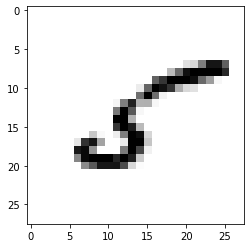

In [8]:
some_digit = X[11]  # y[0] is predicted as 3 use 11
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest") 
plt.axis("on")
plt.show()

In [9]:
neigh.predict([some_digit]) #basic test

array(['5'], dtype=object)

In [18]:
neigh.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [10]:
from sklearn.model_selection import cross_val_predict
#calculate confusion matrix using sklrearn cross val predict
y_train_pred = cross_val_predict(neigh, X_train, y_train, cv=3)


In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[1983,    1,    0,    0,    0,    2,    6,    2,    0,    0],
       [   0, 2272,    1,    1,    2,    0,    0,    3,    1,    1],
       [  24,   42, 1811,    7,    1,    2,    1,   31,    8,    2],
       [   7,   15,   27, 1927,    1,   40,    4,   18,   22,   15],
       [   2,   32,    1,    1, 1831,    0,   10,    3,    0,   65],
       [   9,   12,    2,   37,    8, 1662,   24,    2,    3,   16],
       [  16,    8,    2,    0,    1,   11, 1933,    0,    0,    0],
       [   1,   29,    5,    2,   14,    1,    0, 2011,    0,   30],
       [  16,   40,   21,   49,   20,   37,   12,   10, 1681,   36],
       [  12,    8,    3,   20,   42,    0,    2,   24,    3, 1900]],
      dtype=int64)

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(neigh, X_train, y_train, cv=3, scoring="accuracy")

array([0.95545223, 0.94765262, 0.94854485])

In [27]:
from sklearn.metrics import precision_score, recall_score
#from sklearn.model_selection import cross_val_score
print(recall_score(y_train, y_train_pred, average='weighted'))
precision_score(y_train, y_train_pred, average='weighted')

0.95055


0.9511308143917792

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = [{ 'weights': ['uniform', 'distance'], 'n_neighbors': [2,3,4,5], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

5, weights=uniform, score=0.952, total= 2.1min
[CV] algorithm=auto, n_neighbors=5, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=5, weights=uniform, score=0.954, total= 2.0min
[CV] algorithm=auto, n_neighbors=5, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=5, weights=uniform, score=0.949, total= 2.0min
[CV] algorithm=auto, n_neighbors=5, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=5, weights=uniform, score=0.957, total= 2.0min
[CV] algorithm=auto, n_neighbors=5, weights=distance .................
[CV]  algorithm=auto, n_neighbors=5, weights=distance, score=0.960, total= 1.9min
[CV] algorithm=auto, n_neighbors=5, weights=distance .................
[CV]  algorithm=auto, n_neighbors=5, weights=distance, score=0.951, total= 1.9min
[CV] algorithm=auto, n_neighbors=5, weights=distance .................
[CV]  algorithm=auto, n_neighbors=5, weights=distance, score=0.954, total= 1.9min
[CV] algorithm=auto, n_neighbors=5, we

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [2, 3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)